# 6.1 Árboles de decisión

Es un árbol de clasificación binaria (como los árboles de Huffman) construído de manera top-down.  
Para un conjunto de observaciones de entrenamiento se va partiendo el dataset en dos recursivamente hasta llegar a una condición de conjunto mínimo.

Explicacion basica de arboles de decision
https://www.youtube.com/watch?v=7VeUPuFGJHk


CART **(Classification And Regression Tree)**
https://www.youtube.com/watch?v=DCZ3tsQIoGU

## Ganancia de Información

$$ IG=H(S)-\sum_v \frac{|S_v|}{|S|} H(S_v) $$

## Gini impurity

Utilizado por el algoritmo de ACR (Árboles de Clasificación y Regresión), la impureza de Gini es una medida de cuán a menudo un elemento elegido aleatoriamente del conjunto sería etiquetado incorrectamente si fue etiquetado de manera aleatoria de acuerdo a la distribución de las etiquetas en el subconjunto. La impureza de Gini se puede calcular sumando la probabilidad de cada elemento siendo elegido multiplicado por la probabilidad de un error en la categorización de ese elemento. Alcanza su mínimo (cero) cuando todos los casos del nodo corresponden a una sola categoría de destino.

Para calcular la impureza de Gini de un conjunto de elementos, supongamos i toma valores en $\{1, 2, ..., m\}$, y sea $f_i$ la fracción de artículos etiquetados con valor $i$ en el conjunto.

$$I_{G}(f) = \sum_{i=1}^{m} f_i (1-f_i) = \sum_{i=1}^{m} (f_i - {f_i}^2) = \sum_{i=1}^m f_i - \sum_{i=1}^{m} {f_i}^2 = 1 - \sum^{m}_{i=1} {f_i}^{2}$$


## Desventaja

* Se pueden crear árboles muy complejos que no generalizan bien ya que se toman en cuenta muchos casos particulares. Se soluciona con pruning. No implementado en sklearn.


## Ventajas
* Interpretabilidad
* Poca preparación de datos (no hace falta normalización, por ej)
* La predicción es muy rápida

# El dataset de Iris

- Es un conjunto de datos multivariante introducido por Ronald Fisher en su articulo de 1936, The use of multiple measurements in taxonomic problems (El uso de medidas múltiples en problemas taxonómicos) como un ejemplo de análisis discriminante lineal.

- El conjunto de datos contiene 50 muestras de cada una de tres especies de Iris (Iris setosa, Iris virginica e Iris versicolor). 

- Se midió cuatro rasgos de cada muestra: el largo y ancho del sépalo y pétalo, en centímetros. Basado en la combinación de estos cuatro rasgos, Fisher desarrolló un modelo discriminante lineal para distinguir entre una especie y otra.

In [6]:
!wget https://raw.githubusercontent.com/lab-ml-itba/Arboles-de-decision/master/helper_DT.py

/bin/sh: wget: command not found


In [7]:
# Si está local
import sys
sys.path.append('./src')

In [8]:
%load_ext autoreload
%autoreload 2

import helper_DT
from sklearn.datasets import load_iris
from sklearn import tree
from matplotlib import pyplot as plt

iris = load_iris()
iris.keys()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [9]:
print(iris["data"][0])
print(iris["target"][0])
print(iris["target_names"])
print(iris["DESCR"])
print(iris["feature_names"])
print(iris["filename"])

[5.1 3.5 1.4 0.2]
0
['setosa' 'versicolor' 'virginica']
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!

In [10]:
from sklearn.model_selection import train_test_split

X = iris["data"]
y = iris["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42,stratify=y)

In [1]:
clf = tree.DecisionTreeClassifier(criterion="gini",
                                 splitter="best",
                                 max_depth=3)
clf = clf.fit(X_train, y_train)

print("Train Score: {}".format(clf.score(X_train, y_train)))
print("Test Score: {}".format(clf.score(X_test, y_test)))

plt.figure(figsize=[10, 10])
# Disponible en la versión 0.21.3 de sklearn
out = tree.plot_tree(clf,
                   max_depth=20,
                   feature_names=["sepal length","sepal width","petal length","petal width"],
                   class_names=iris["target_names"],
                   filled=True,
                   impurity=True,
                   proportion=False)

NameError: name 'tree' is not defined

## Feature importance

Es una medida de cuánto ayuda a reducir la impureza cada uno de los features utilizados. Se utiliza para hacer selección de features.
Se calcula de la siguiente forma:

para cada nodo $j$ se calcula la importancia del nodo ($ni$):

$$ ni_j=w_j * C_j-w_{left_j} * C_{left_j} - w_{right_j} * C_{right_j} $$

Donde:

$ni_j$: Importancia del nodo $j$  
$w_j$: Proporción de las muestras que caen en el nodo $j$  
$C_j$: Impureza del nodo $j$  
$left_j$: hijo izquierdo del nodo $j$  
$right_j$: hijo derecho del nodo $j$

Una vez calculados los $ni_j$ para cada nodo se calcula el feature importance para el feature $i$ de la siguiente manera:

$$fi_i=\frac{\sum_{j \in \text{nodos en los que se usa i para hacer el split}}{ni_j}}{\sum_{j \in \text{todos los nodos}}{ni_j}}$$

In [12]:
pw_1 = 0.667 - 74 / 112 * 0.5

pl_1 = 0.142 * 39 / 112 - 4 / 112 * 0.375
pl_2 = 0.056 * 35 / 112 - 2 / 112 * 0.5

pw_2 = 0.5 * 74 / 112 - (39 / 112 * 0.142 + 35 / 112 * 0.056)

fi_pw = pw_1 + pw_2
fi_pl = pl_1 + pl_2

fi_pw / (fi_pw + fi_pl)

0.9307794582017617

In [13]:
fi_pl / (fi_pw + fi_pl)

0.06922054179823829

In [14]:
clf.feature_importances_

array([0.        , 0.        , 0.06903089, 0.93096911])

In [15]:
import numpy as np

def generate_gaussians(N0, N1, mu0, mu1, s):
    '''
    Funcion para generar una distribucion gausiana
    '''
    # N1: Cantidad de personas
    sigma = [[s, 0], [0, s]]
    np.random.seed(231)
    
    X = np.vstack([np.random.multivariate_normal(mu0, sigma, N0), 
                   np.random.multivariate_normal(mu1, sigma, N1)])
    y = np.hstack([np.zeros(N0), np.ones(N1)])
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, shuffle=True)
    
    return X_train, X_test, y_train, y_test


In [16]:
X_train, X_test, y_train, y_test = generate_gaussians(N0=1000,N1=1000,mu0=[2,5],mu1=[3,3],s=2)

Train Score: 0.8365671641791045
Test Score: 0.7742424242424243


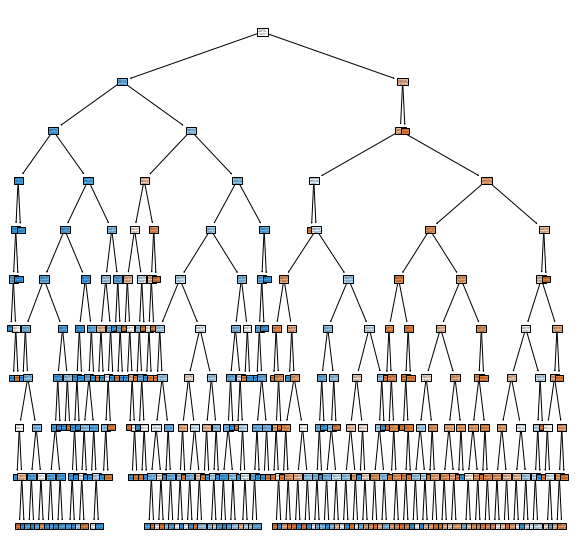

In [17]:
clf = tree.DecisionTreeClassifier(criterion="entropy",
                                 splitter="random",
                                 max_depth=10)
clf = clf.fit(X_train, y_train)

print("Train Score: {}".format(clf.score(X_train, y_train)))
print("Test Score: {}".format(clf.score(X_test, y_test)))
plt.figure(figsize=[10, 10])

# Disponible en la versión 0.21.3 de sklearn
out = tree.plot_tree(clf,
                   max_depth=20,
                   feature_names=["X1","X2"],
                   class_names=["0","1"],
                   filled=True,
                   impurity=True,
                   proportion=False)

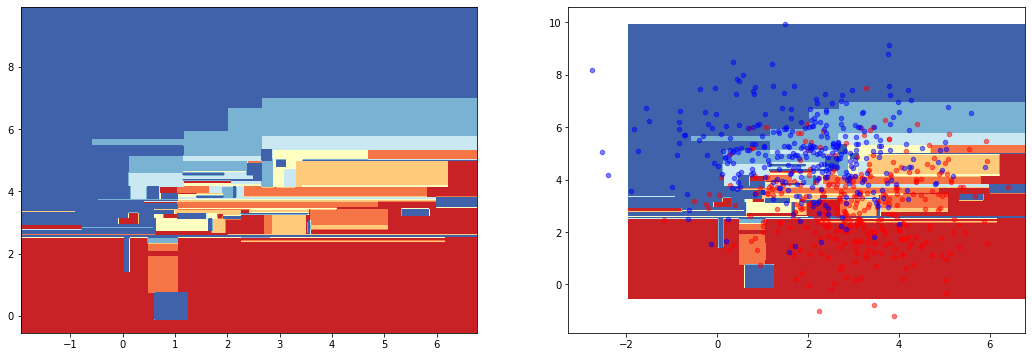

In [18]:
helper_DT.plotBoundaryDT(X_train, y_train, X_test, y_test, clf, N=500)

Si bien un árbol de decisión no es el clasificador óptimo para un dataset generado con gaussianas, veamos qué hiperparámetros podemos modificar para mejorar la regularización.

In [19]:
X_train, X_test, y_train, y_test = generate_gaussians(N0=5000, N1=5000, mu0=[2,5], mu1=[3,3], s=2)

In [20]:
def gen_tree(X_train, y_train, X_test, y_test,
             criterion="entropy",
             splitter="best",
             max_depth=None, 
             min_samples_split=2,
             min_samples_leaf=1,
             min_weight_fraction_leaf=0.,
             max_features=None,
             max_leaf_nodes=None,
             min_impurity_decrease=0.,
             plot_tree=False):
    
    clf = tree.DecisionTreeClassifier(criterion=criterion,
                                     splitter=splitter,
                                     max_depth=max_depth,
                                     min_samples_split=min_samples_split,
                                     min_samples_leaf=min_samples_leaf,
                                     min_weight_fraction_leaf=min_weight_fraction_leaf,
                                     max_features=max_features,
                                     max_leaf_nodes=max_leaf_nodes,
                                     min_impurity_decrease=min_impurity_decrease
                                     )
    clf = clf.fit(X_train, y_train)
    
    print("Train Score: {}".format(clf.score(X_train, y_train)))
    print("Test Score: {}".format(clf.score(X_test, y_test)))
    
    helper_DT.plotBoundaryDT(X_train, y_train, X_test, y_test, clf, N=500)
    
    if plot_tree:
        plt.figure(figsize=[10, 10])
        # Disponible en la versión 0.21.3 de sklearn
        out = tree.plot_tree(clf,
                           max_depth=20,
                           feature_names=["X1","X2"],
                           class_names=["0","1"],
                           filled=True,
                           impurity=True,
                           proportion=False)

Train Score: 1.0
Test Score: 0.6987878787878787


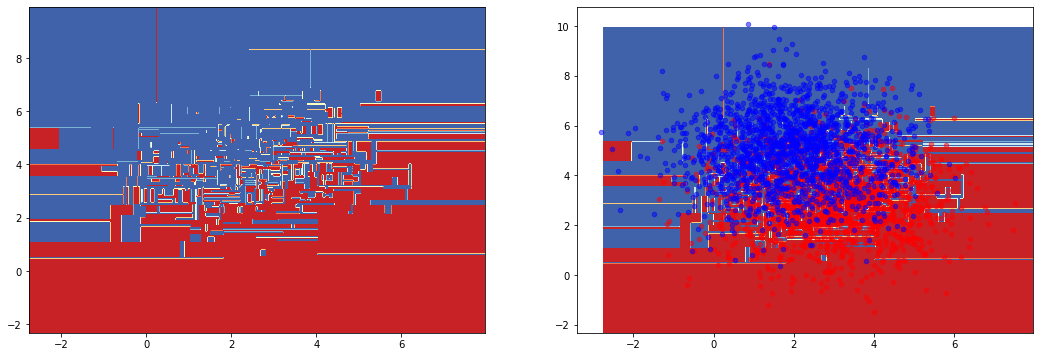

In [21]:
gen_tree(X_train, y_train, X_test, y_test,
             criterion="entropy",
             splitter="best",
             max_depth=None, 
             min_samples_split=2,
             min_samples_leaf=1,
             min_weight_fraction_leaf=0.,
             max_features=None,
             max_leaf_nodes=None,
             min_impurity_decrease=0.,
             plot_tree=False)

# Comparación con QDA

In [22]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

clf_QDA = QuadraticDiscriminantAnalysis()
clf_QDA.fit(X_train, y_train)

print("Train Score: {}".format(clf_QDA.score(X_train, y_train)))
print("Test Score: {}".format(clf_QDA.score(X_test, y_test)))

ImportError: cannot import name '_Sequence' from 'sklearn.utils.fixes' (/Users/ivan/anaconda3/lib/python3.7/site-packages/sklearn/utils/fixes.py)

In [ ]:
#Búsqueda de hiperparámetros
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import GridSearchCV

param_grid = {'criterion': ['entropy', 'gini'], 
              'splitter': ['best', 'random'],
              'max_depth': [None, 30, 20, 10],
              'min_samples_split':[2,4,8],
              'min_samples_leaf':[1,2,4,8],
              'min_weight_fraction_leaf':[0.,0.01, 0.02],
              'max_features':[None,1],
              'max_leaf_nodes':[None,50,100],
              'min_impurity_decrease':[0.,0.05,0.1] 
            }

trees = tree.DecisionTreeClassifier()
clf = GridSearchCV(trees, param_grid, cv=4,verbose=1, n_jobs=-1)
clf.fit(X_train, y_train)

In [ ]:
import pandas as pd

df = pd.DataFrame(clf.cv_results_)
df.head()

In [ ]:
df["mean_test_score"].hist(bins=20)

In [ ]:
clf.best_params_

In [ ]:
clf.best_estimator_.score(X_test,y_test)

In [ ]:
gen_tree(X_train, y_train, X_test, y_test,
             criterion="gini",
             splitter="best",
             max_depth=20, 
             min_samples_split=4,
             min_samples_leaf=8,
             min_weight_fraction_leaf=0.02,
             max_features=1,
             max_leaf_nodes=100,
             min_impurity_decrease=0.,
             plot_tree=False)